In [2]:
import numpy as np
import pandas as pd
import scanpy as sc # v1.6",
import sys
import matplotlib.pyplot as plt
import os.path
import anndata
from matplotlib import rcParams
import seaborn as sns
import numba
#import mnnpy
import scipy

In [2]:
#import full COVID-19 PBMC dataset
os.chdir('H:/1401/applications/presentation/E-MTAB-10026/')
covid_total = sc.read_h5ad('covid_portal_210320_with_raw.h5ad')
covid_total

AnnData object with n_obs × n_vars = 647366 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [3]:
#Subset PBMC data to myeloid populations and reorder categories (for dotplot visualisations)

blood_myeloid = covid_total[covid_total.obs.full_clustering.isin(['CD83_CD14_mono', 'CD14_mono', 
                                                                  'CD16_mono', 'C1_CD16_mono',
                                                                 'DC1', 'DC2', 'DC3', 'ASDC', 'pDC', 'DC_prolif',
                                                                 'Mono_prolif']),:]

blood_myeloid.obs.full_clustering = blood_myeloid.obs.full_clustering.cat.reorder_categories([
'DC1', 'DC2', 'DC3', 'ASDC', 'pDC', 'DC_prolif', 
    'CD83_CD14_mono', 'CD14_mono', 'CD16_mono', 'C1_CD16_mono', 'Mono_prolif'])
blood_myeloid

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\generic.py:5604: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


AnnData object with n_obs × n_vars = 154055 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

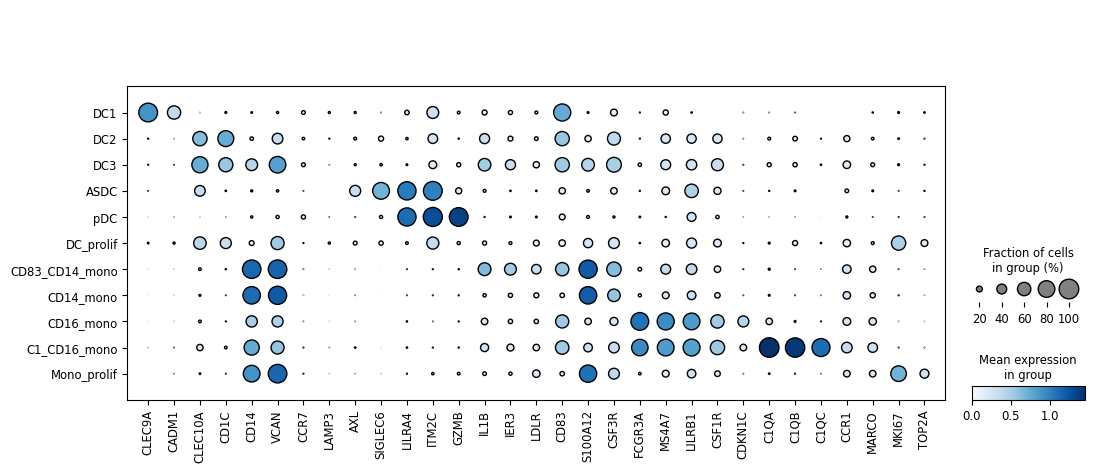

In [4]:
##myeloid figure dotplot - fig 2A (left - RNA)

sc.pl.DotPlot(blood_myeloid, [
'CLEC9A', 'CADM1', 'CLEC10A','CD1C', 'CD14', 'VCAN',
    'CCR7', 'LAMP3',
                            'AXL', 'SIGLEC6',
                            'LILRA4', 'ITM2C', 'GZMB',
    'IL1B', 'IER3', 'LDLR', 'CD83',
                         'S100A12', 'CSF3R', 
                        'FCGR3A', 'MS4A7', 'LILRB1', 'CSF1R', 'CDKN1C',
                         'C1QA', 'C1QB', 'C1QC', 'CCR1',
    
    'MARCO', 'MKI67', 'TOP2A'], 
              log = True, 
              groupby='full_clustering').style(cmap='Blues',dot_edge_color='black', dot_edge_lw=1).swap_axes(False).show(True)


In [4]:
#import full COVID-19 BALF dataset
os.chdir('H:/1401/applications/presentation/GSE145926/')
bal = sc.read_h5ad('Bso2.h5ad')

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

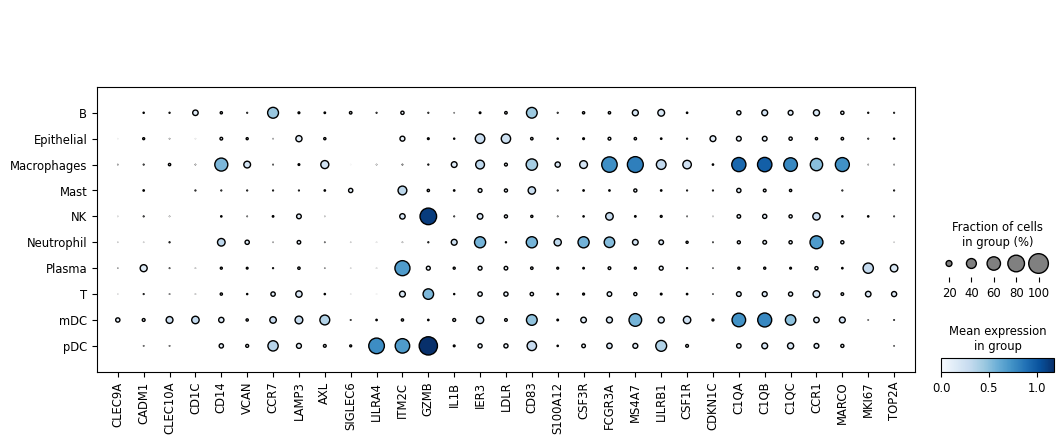

In [5]:
## BALF figure dotplot - fig 2A (left - RNA)

sc.pl.DotPlot(bal, [
'CLEC9A', 'CADM1', 'CLEC10A','CD1C', 'CD14', 'VCAN',
    'CCR7', 'LAMP3',
                            'AXL', 'SIGLEC6',
                            'LILRA4', 'ITM2C', 'GZMB',
    'IL1B', 'IER3', 'LDLR', 'CD83',
                         'S100A12', 'CSF3R', 
                        'FCGR3A', 'MS4A7', 'LILRB1', 'CSF1R', 'CDKN1C',
                         'C1QA', 'C1QB', 'C1QC', 'CCR1',
    
    'MARCO', 'MKI67', 'TOP2A'], 
              log = True, 
              groupby='full_clustering').style(cmap='Blues',dot_edge_color='black', dot_edge_lw=1).swap_axes(False).show(True)

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

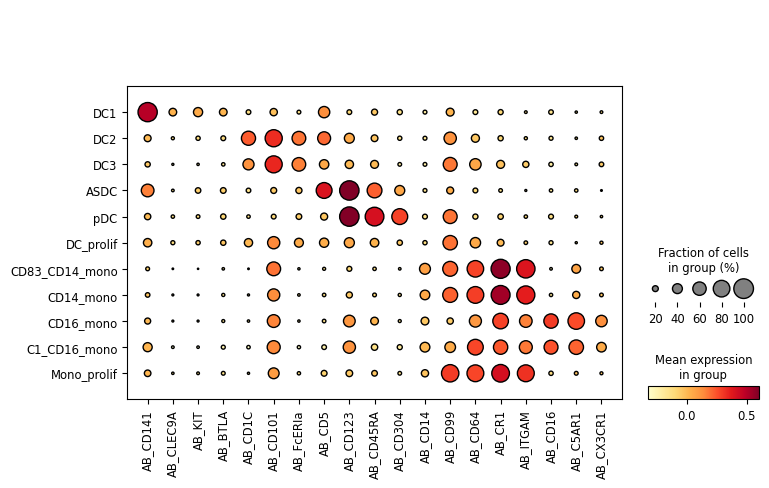

In [5]:
##myeloid figure dotplot - fig 2A (right - protein) - using only PBMC data (no CITEseq data for BAL)

sc.pl.DotPlot(blood_myeloid, ['AB_CD141', 'AB_CLEC9A', 'AB_KIT','AB_BTLA',
                            'AB_CD1C', 'AB_CD101', 'AB_FcERIa',
                            'AB_CD5', 
                            'AB_CD123', 'AB_CD45RA', 'AB_CD304',
                            'AB_CD14', 'AB_CD99', 'AB_CD64',  
                            'AB_CR1', 'AB_ITGAM',
                            'AB_CD16', 'AB_C5AR1',
                              'AB_CX3CR1'], 
              log = True, 
              groupby='full_clustering',  expression_cutoff=0.15).style(cmap='YlOrRd',dot_edge_color='black', dot_edge_lw=1).swap_axes(False).show(True)
